# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  Kaggle
2. **Nama Dataset**: Lifestyle and Health Risk Prediction
3. **Link Dataset**: https://www.kaggle.com/datasets/miadul/lifestyle-and-health-risk-prediction/data
4. **Dataset Overview**: This synthetic health dataset simulates real-world lifestyle and wellness data for individuals.
It is designed to help data scientists, machine learning engineers, and students build and test health risk prediction models safely — without using sensitive medical data.
5. **Features**:
      - Age: Age of the person
      - Weight: Body weight in kg
      - Height: Height in cm
      - Exercise: Exercise frequency level (none, low, medium, high)
      - Sleep: Average hours of sleep per night
      - Sugar_intake: Level of sugar consumption (low, medium, high)
      - Smoking: smoking habbit (yes, no)
      - Alcohol: alcohol consumption habbit (yes, no)
      - Married: Marital status (yes, no)
      - Profession: Type of work or profession (office worker, teacher, doctor, engineer, etc)
      - bmi: Body mass index calculated



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
# Download latest version
path = kagglehub.dataset_download("miadul/lifestyle-and-health-risk-prediction")

print("Path to dataset files:", path)

100%|██████████| 59.7k/59.7k [00:00<00:00, 59.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/miadul/lifestyle-and-health-risk-prediction/versions/1


In [ ]:
csv_file = os.path.join(path, 'Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv')
dataset_raw = pd.read_csv(csv_file)
dataset = pd.read_csv(csv_file)

dataset_raw.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


In [ ]:
dataset.describe()

,age,weight,height,sleep,bmi
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,48.805600,77.359200,171.933200,6.997060,26.84388
std,17.906991,18.714567,15.822225,1.432849,8.25249
min,18.000000,45.000000,145.000000,3.000000,11.40000
25%,34.000000,61.000000,158.000000,6.000000,20.30000
50%,49.000000,77.000000,171.500000,7.000000,26.00000
75%,64.000000,94.000000,186.000000,8.000000,32.40000
max,79.000000,109.000000,199.000000,10.000000,51.40000


In [ ]:
dataset.duplicated().sum()

np.int64(0)

In [ ]:
numeric_data = dataset.select_dtypes(include=[np.number])
categorical_data = dataset.select_dtypes(include=[object])

In [ ]:
for cat in categorical_data:
    print(f"{'='*30}")
    print(f"VARIABEL: {cat.upper()}")
    print(f"{'='*30}")
    print(f"Jumlah Unique Value: {dataset[cat].nunique()}")
    print("\nDistribusi Frekuensi:")
    print(dataset[cat].value_counts())
    print("\n")

VARIABEL: EXERCISE
Jumlah Unique Value: 4

Distribusi Frekuensi:
exercise
medium    1985
low       1272
high      1000
none       743
Name: count, dtype: int64


VARIABEL: SUGAR_INTAKE
Jumlah Unique Value: 3

Distribusi Frekuensi:
sugar_intake
medium    2511
low       1484
high      1005
Name: count, dtype: int64


VARIABEL: SMOKING
Jumlah Unique Value: 2

Distribusi Frekuensi:
smoking
no     4023
yes     977
Name: count, dtype: int64


VARIABEL: ALCOHOL
Jumlah Unique Value: 2

Distribusi Frekuensi:
alcohol
no     3741
yes    1259
Name: count, dtype: int64


VARIABEL: MARRIED
Jumlah Unique Value: 2

Distribusi Frekuensi:
married
yes    3018
no     1982
Name: count, dtype: int64


VARIABEL: PROFESSION
Jumlah Unique Value: 8

Distribusi Frekuensi:
profession
student          644
farmer           639
driver           631
doctor           630
artist           626
engineer         616
teacher          612
office_worker    602
Name: count, dtype: int64


VARIABEL: HEALTH_RISK
Jumlah Unique V

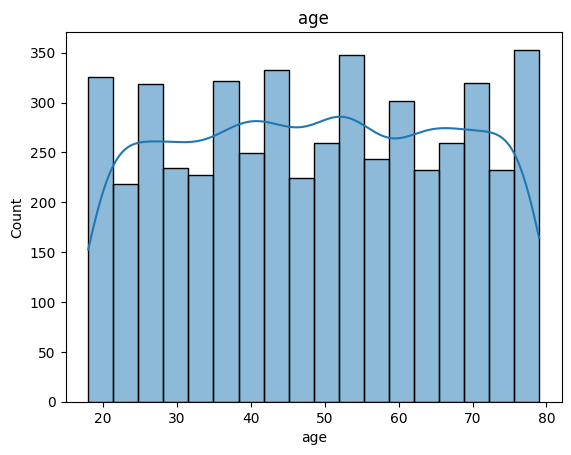

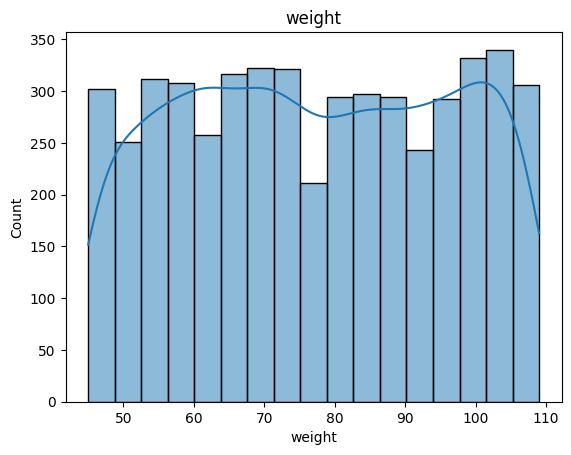

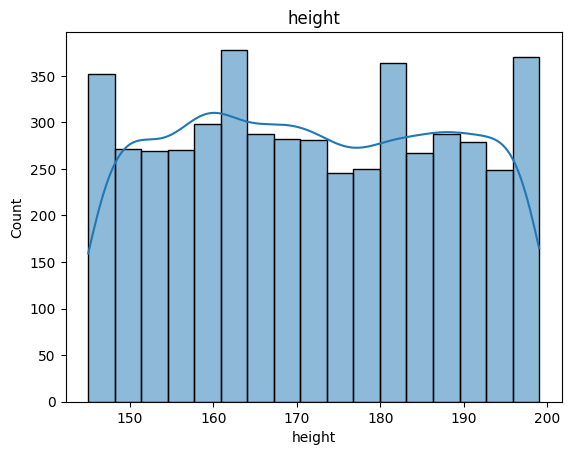

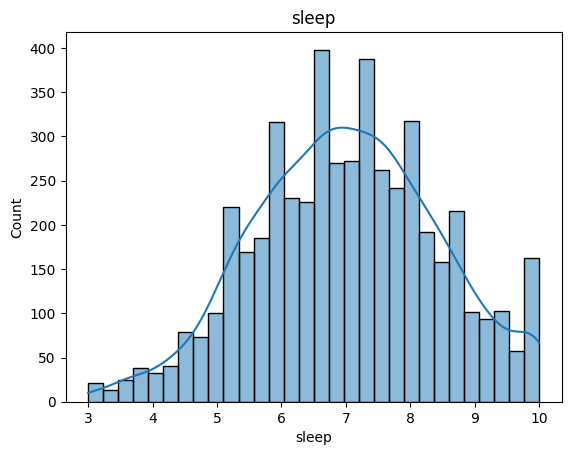

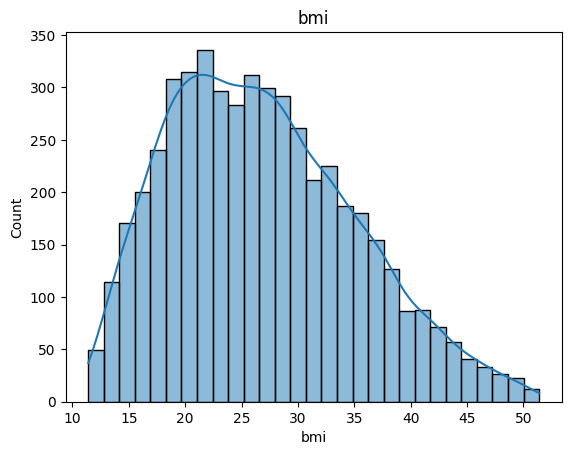

In [ ]:
#Menampilka histogram untuk semua kolom numerik (Opsional skilled 1)
for num in numeric_data:
  sns.histplot(numeric_data[num], kde=True)
  plt.title(num)
  plt.show()
  print('\n')

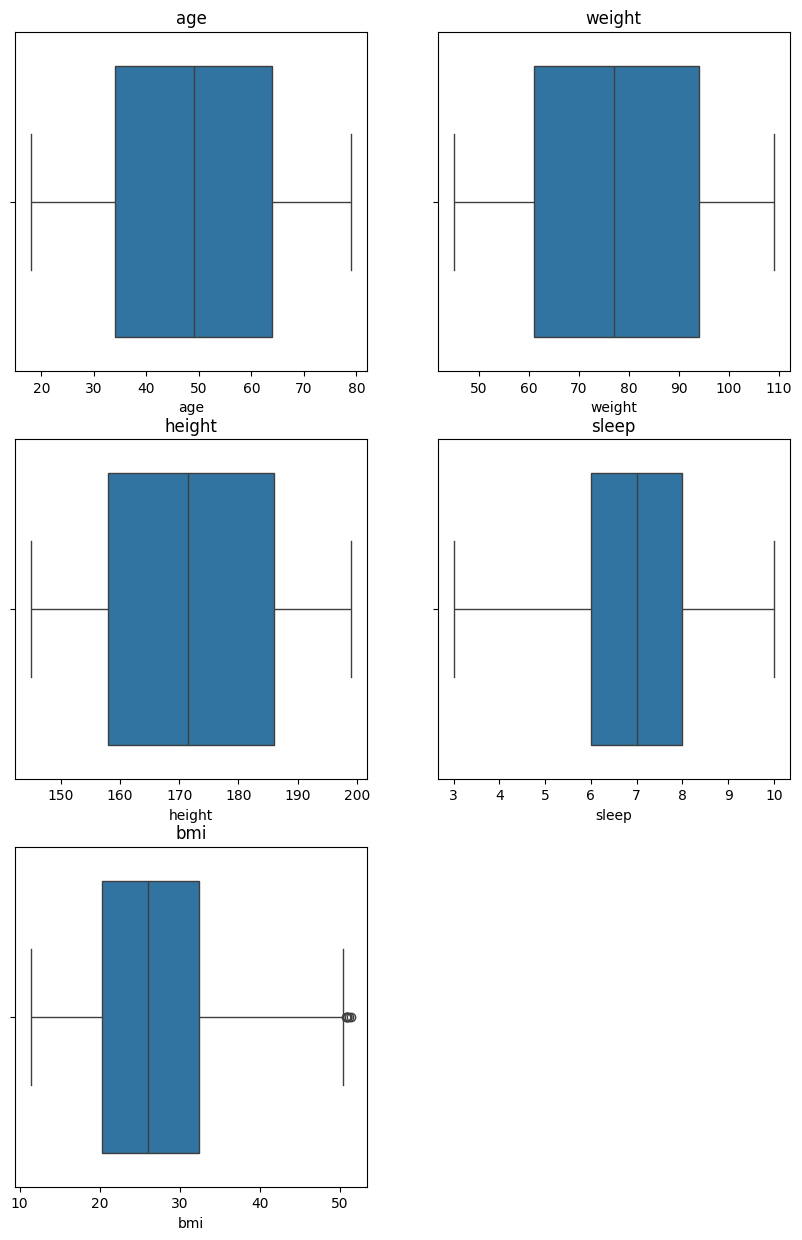

In [ ]:
row = round(len(numeric_data.columns)/2) + 1
fig, axes = plt.subplots(row, 2, figsize=(10, 5 * row))
axes = axes.flatten()

for i, fitur in enumerate(numeric_data.columns):
  sns.boxplot(x=dataset[fitur], ax = axes[i])
  axes[i].set_title(fitur)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

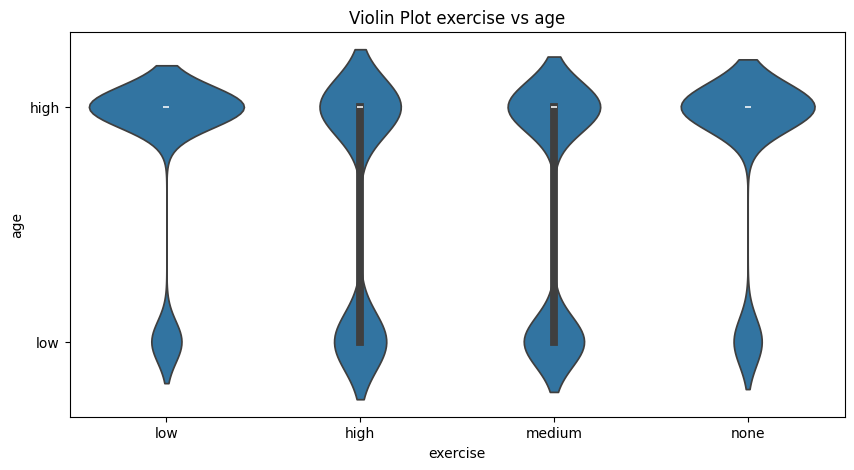

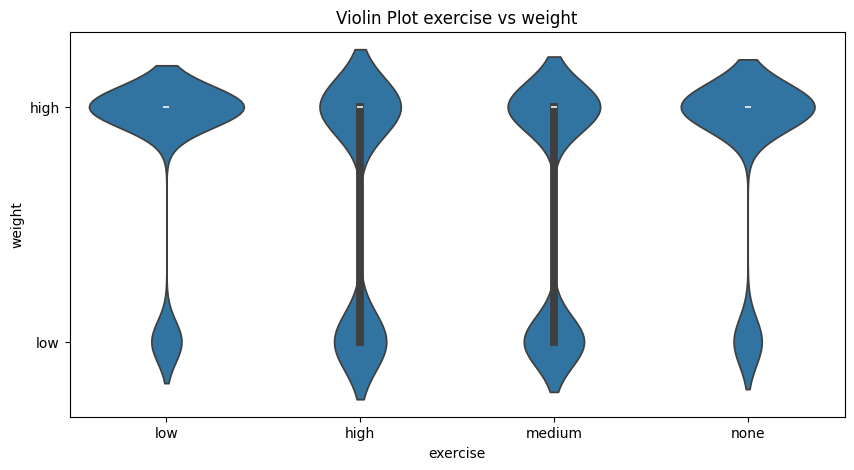

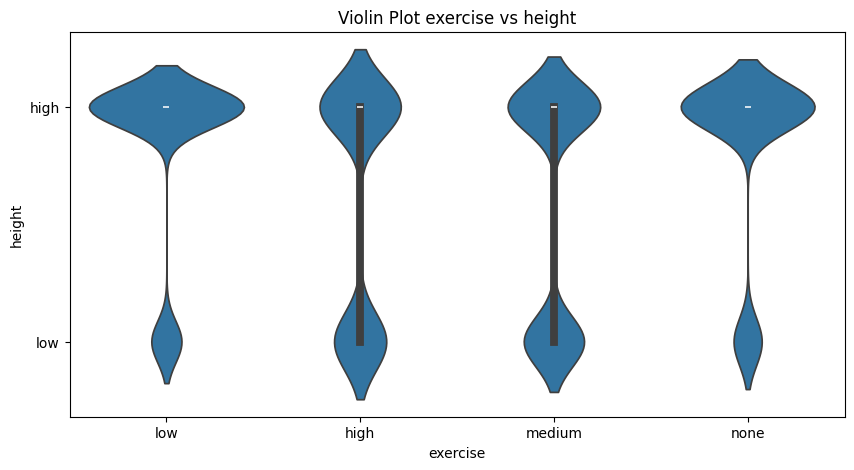

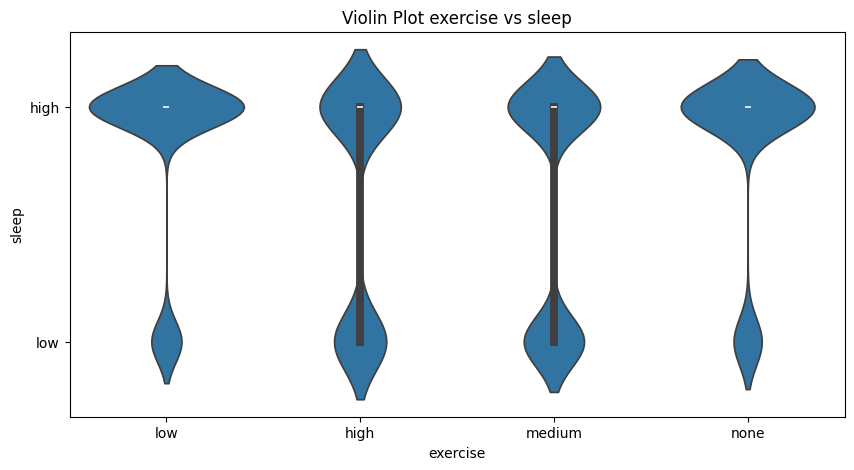

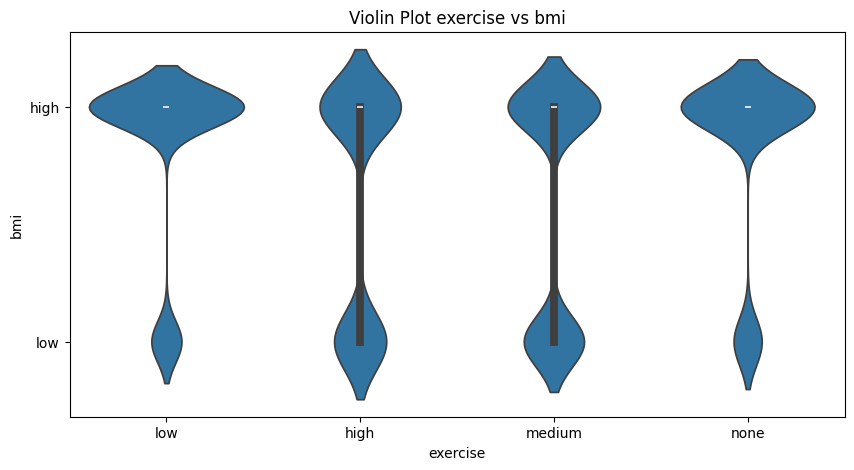

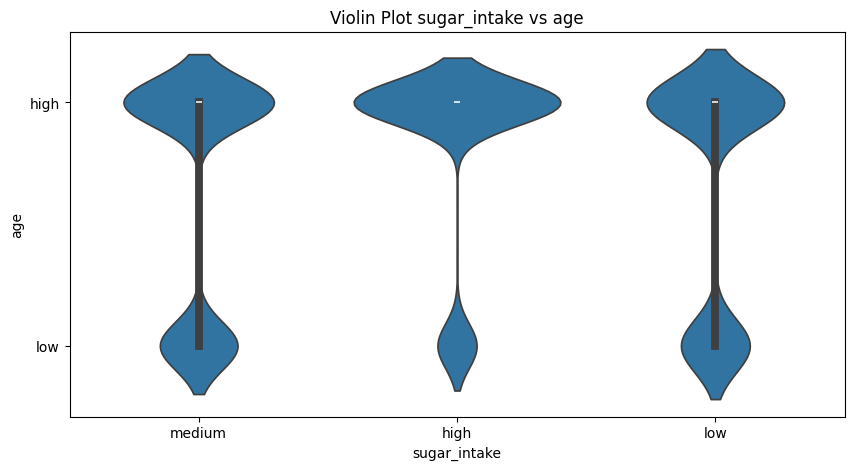

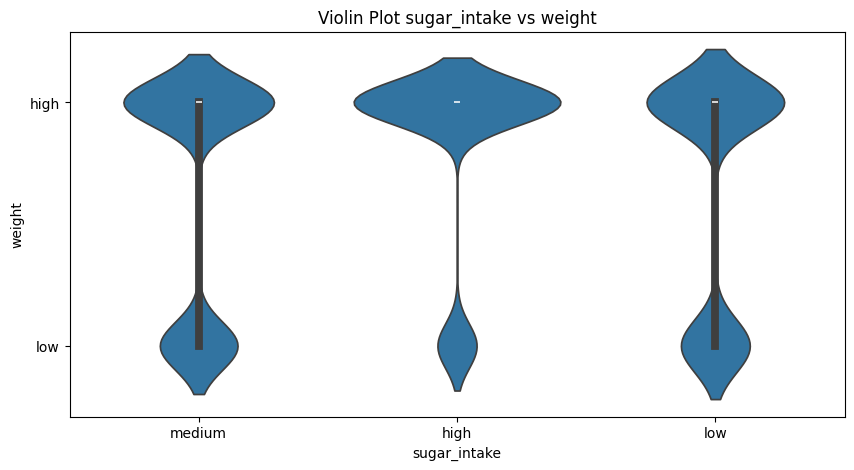

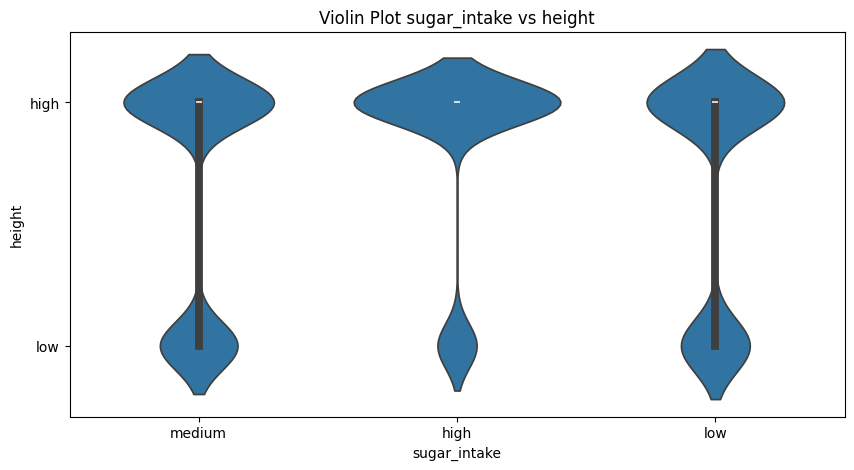

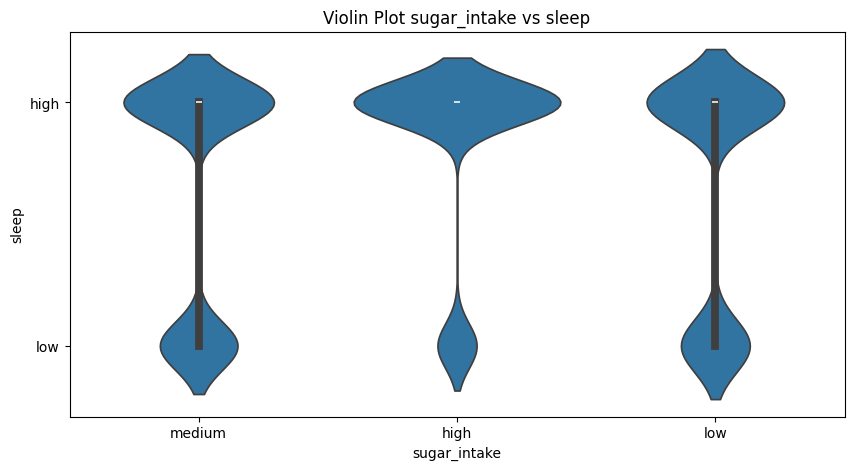

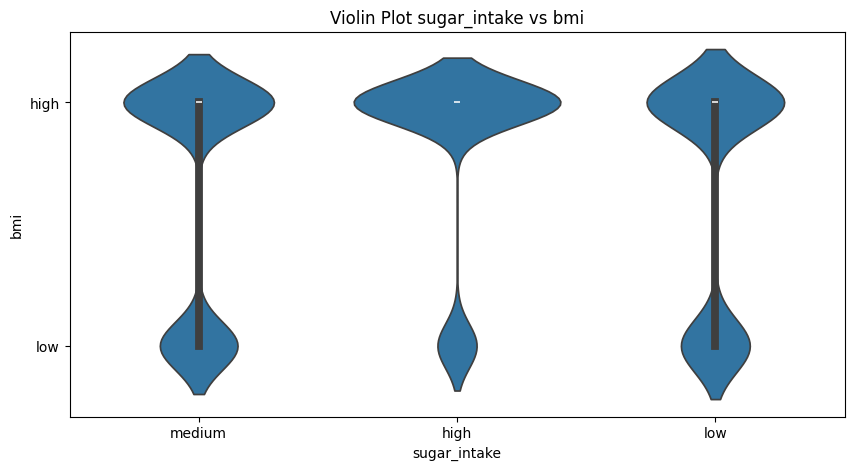

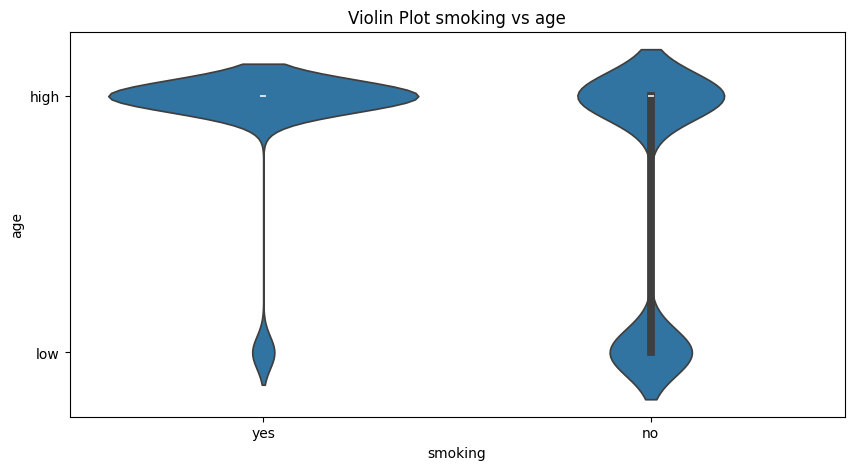

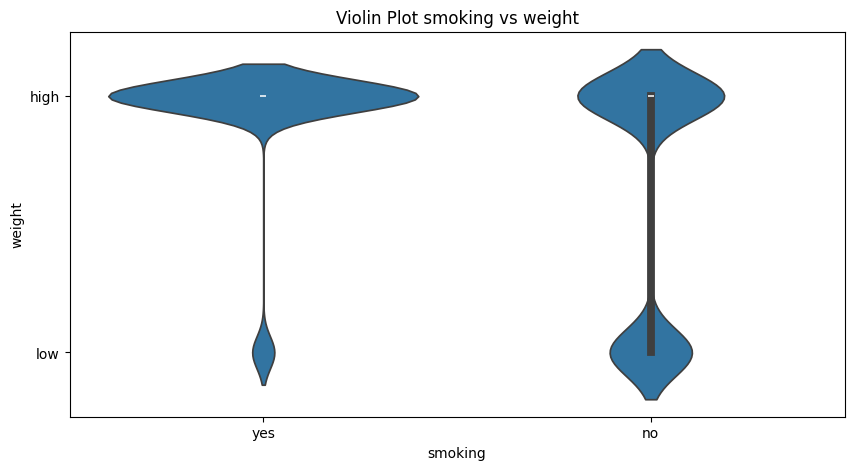

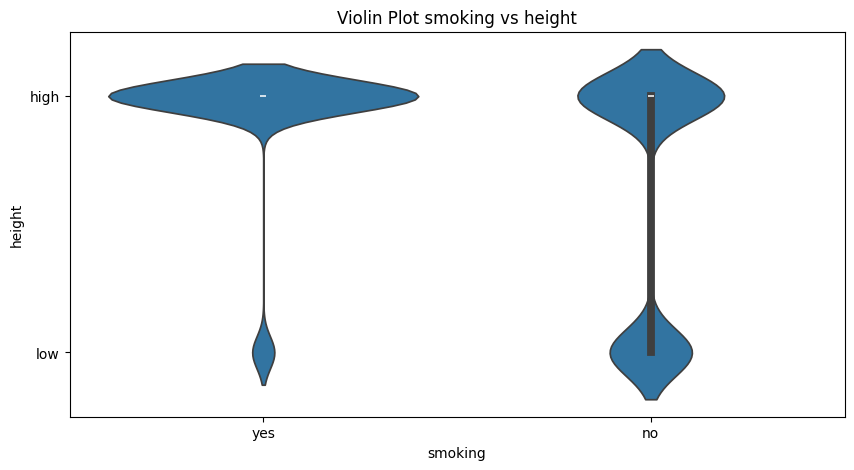

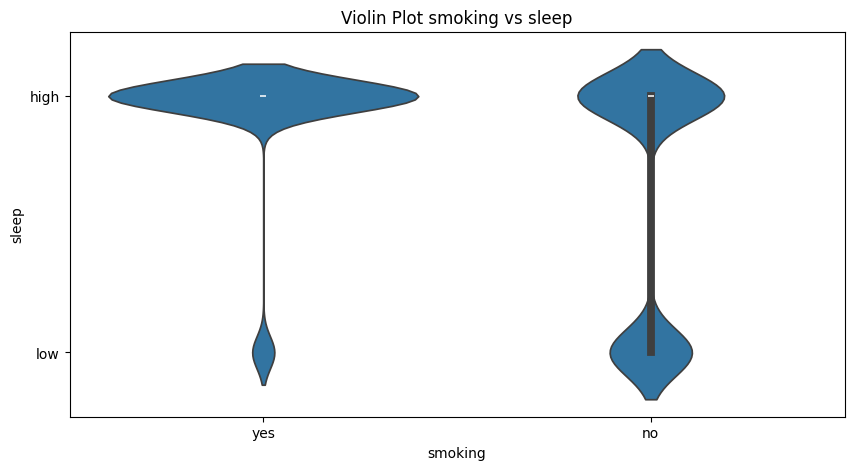

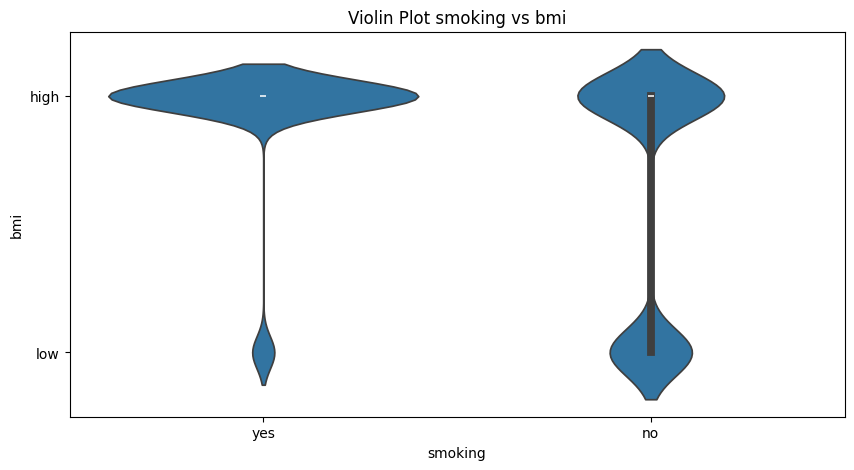

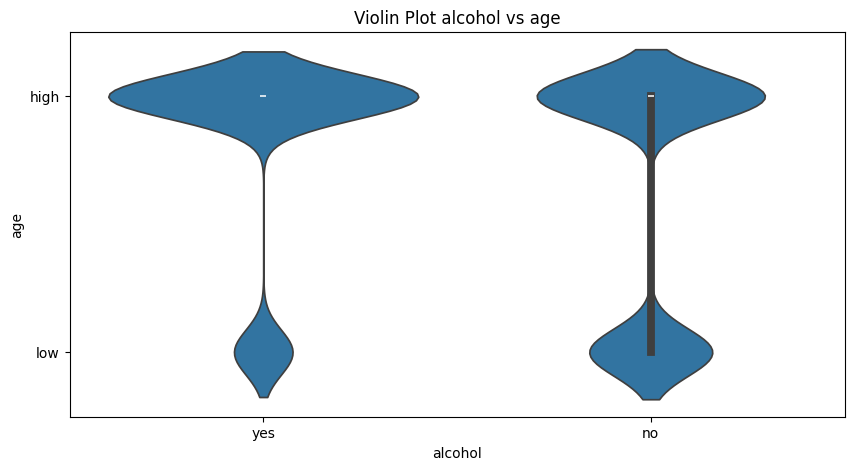

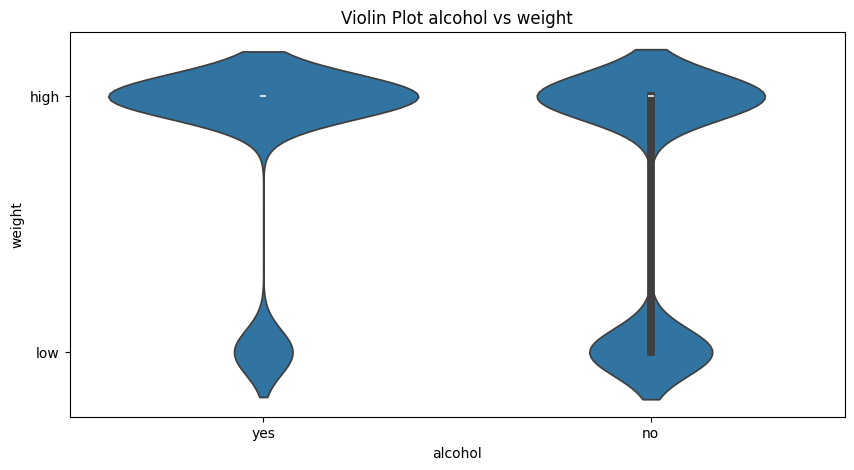

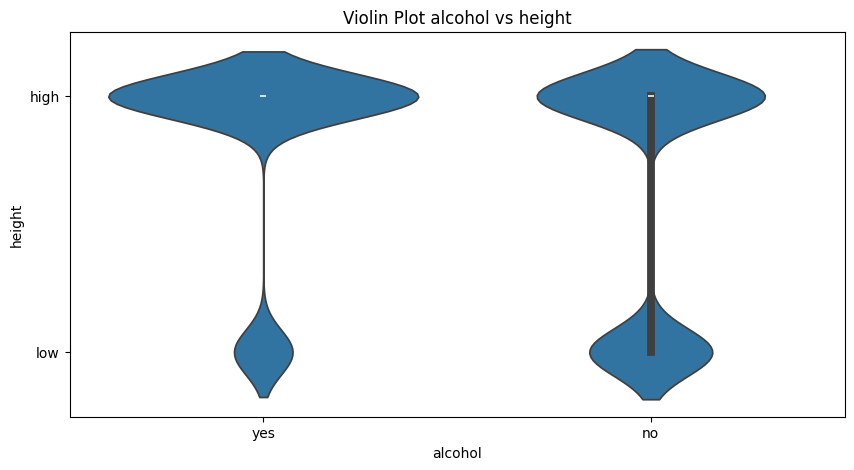

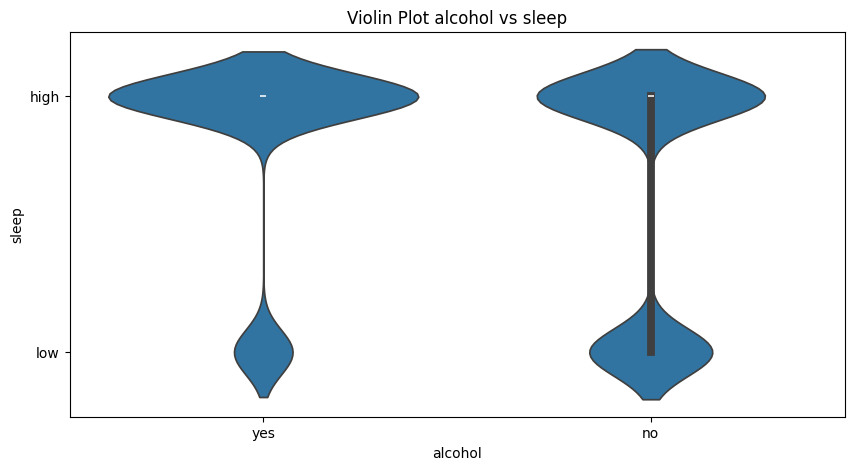

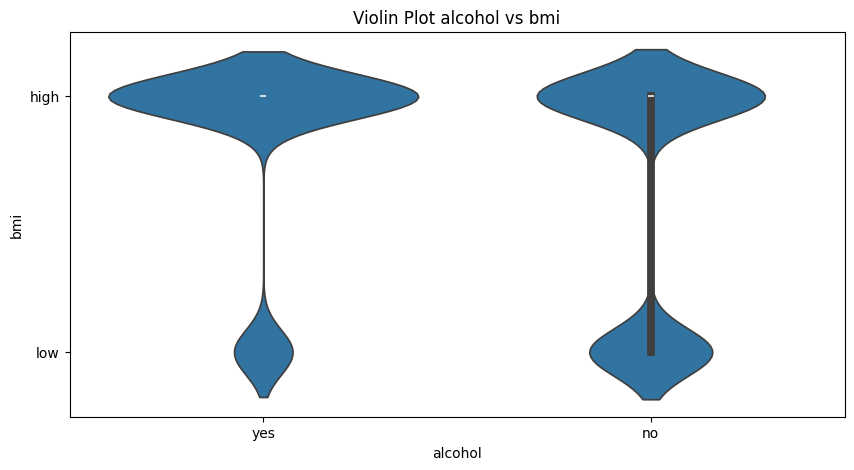

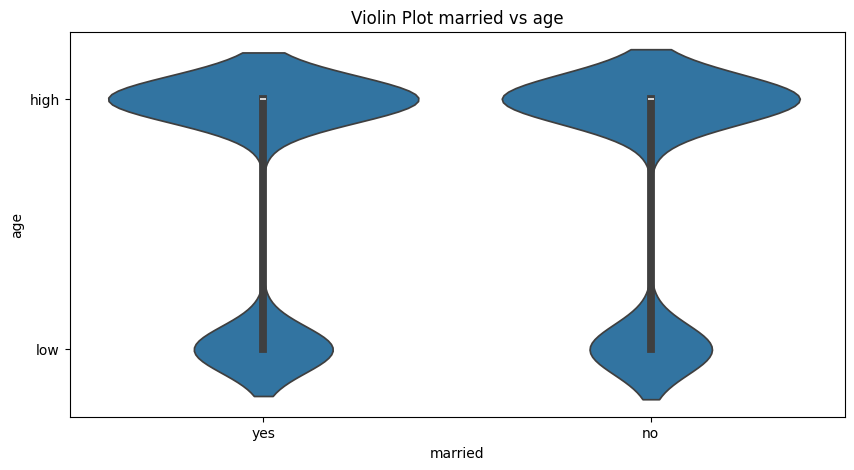

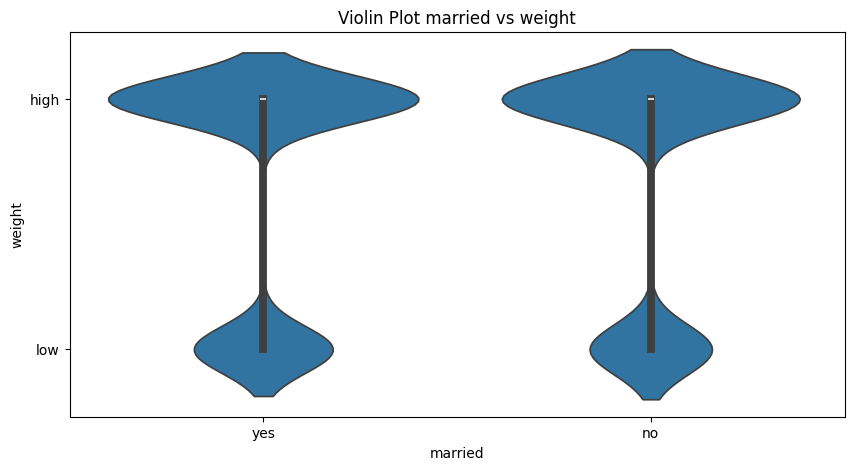

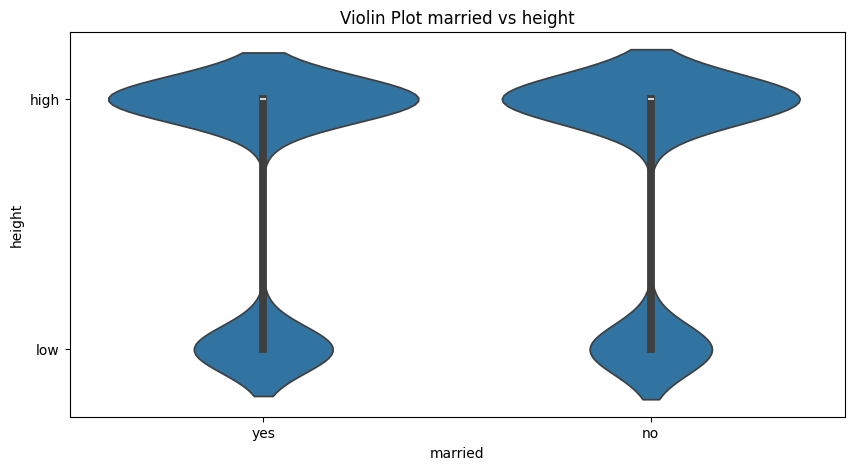

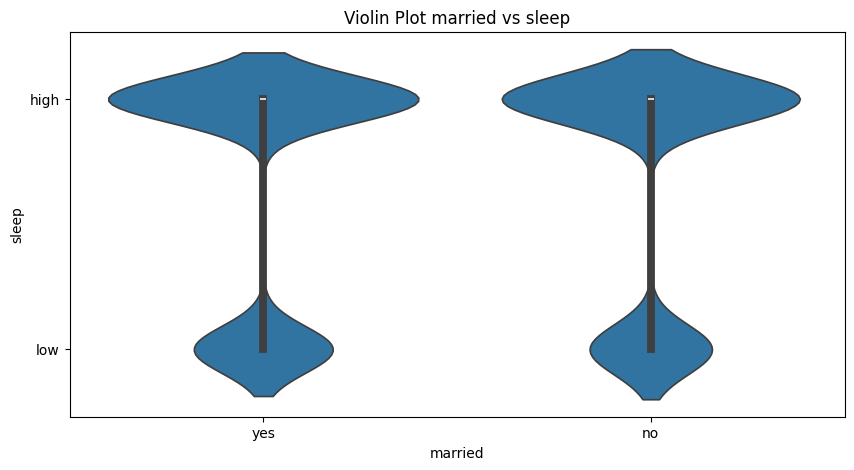

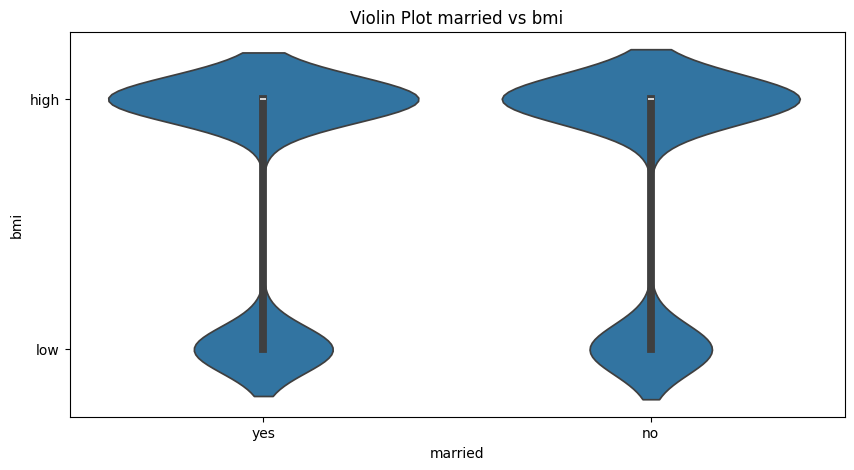

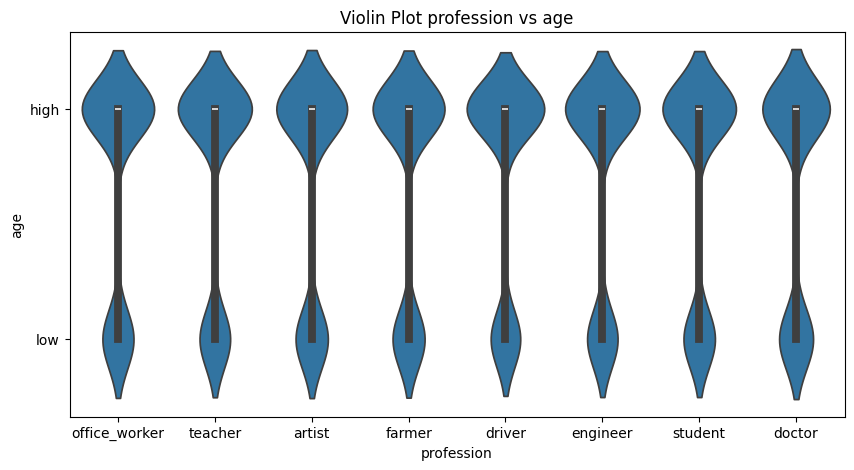

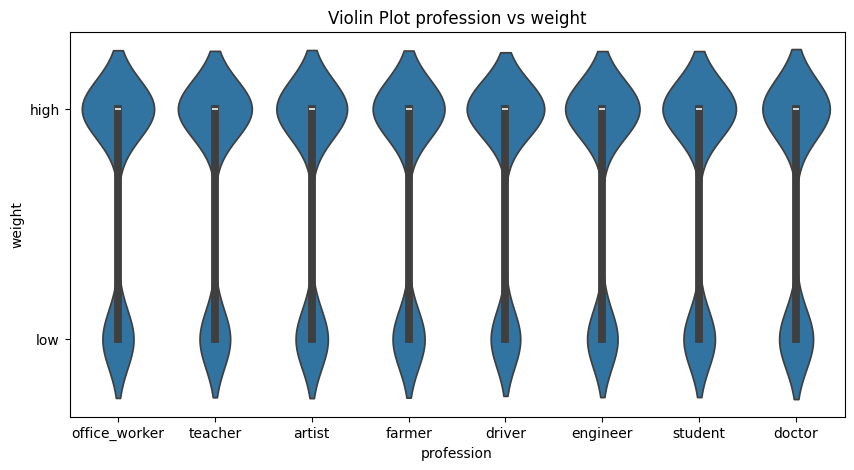

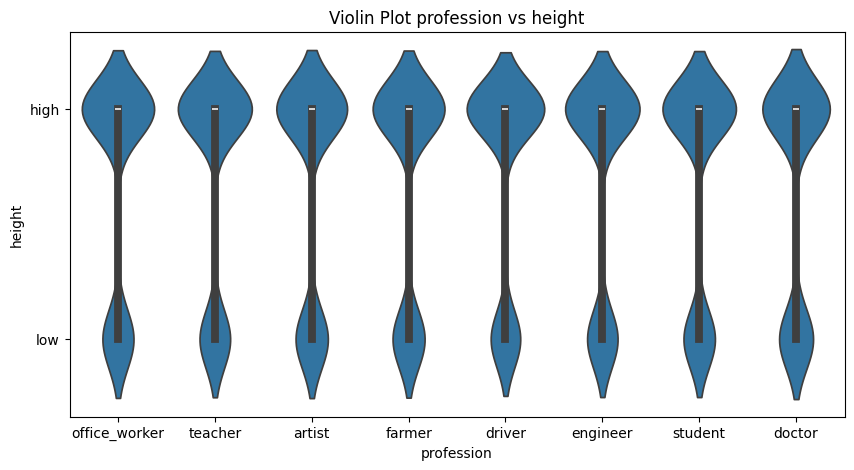

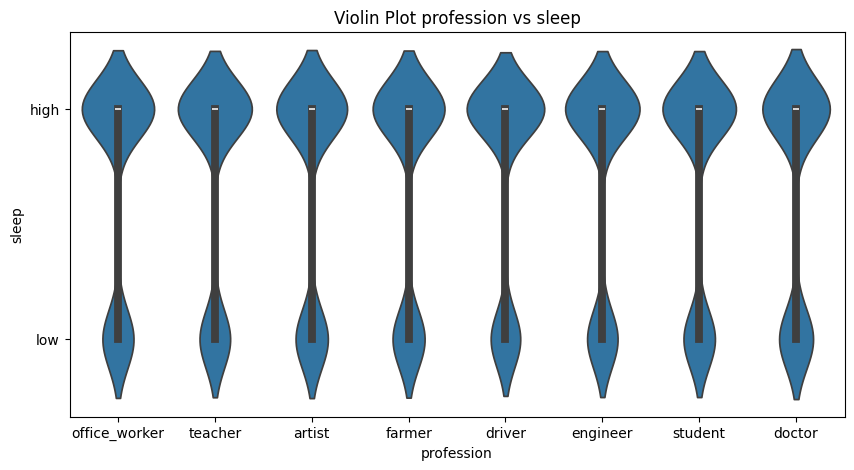

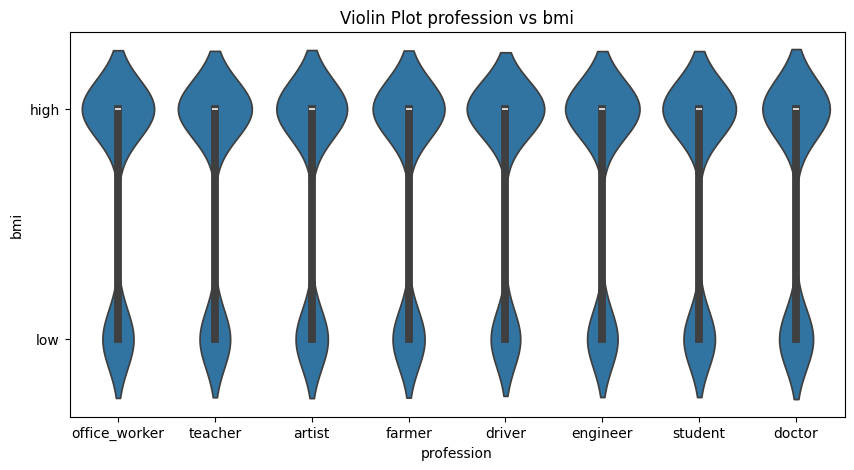

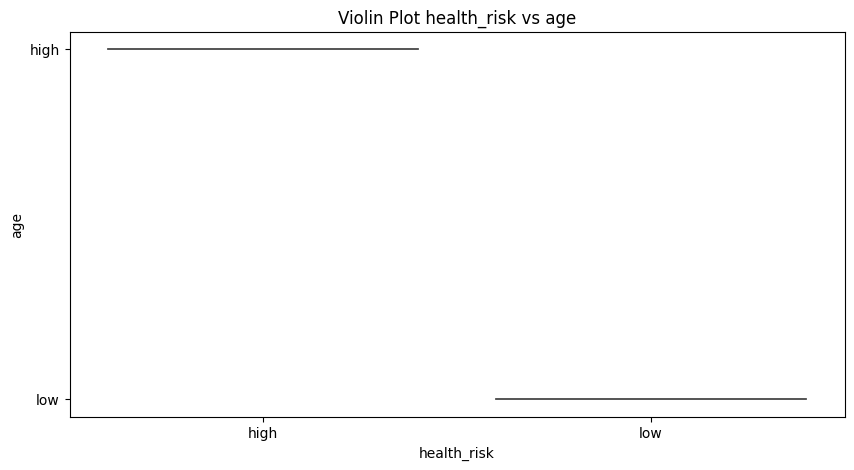

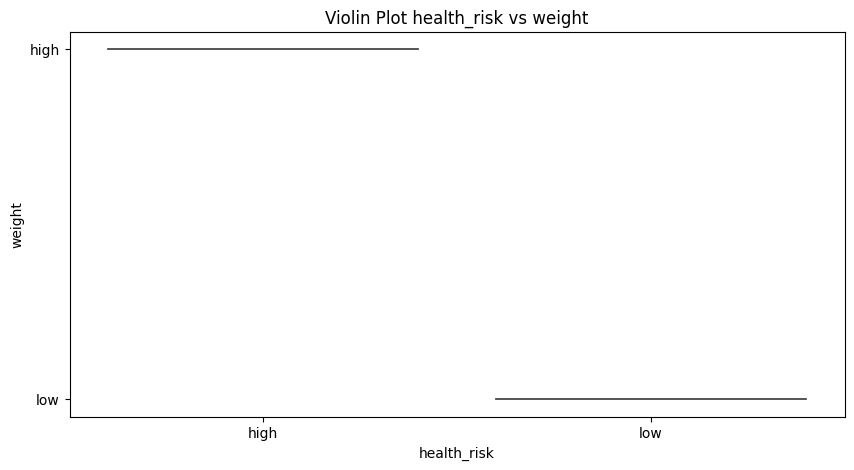

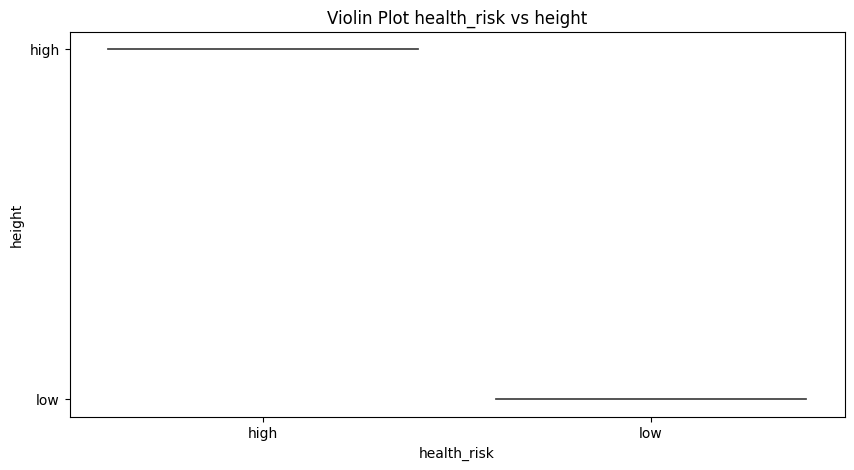

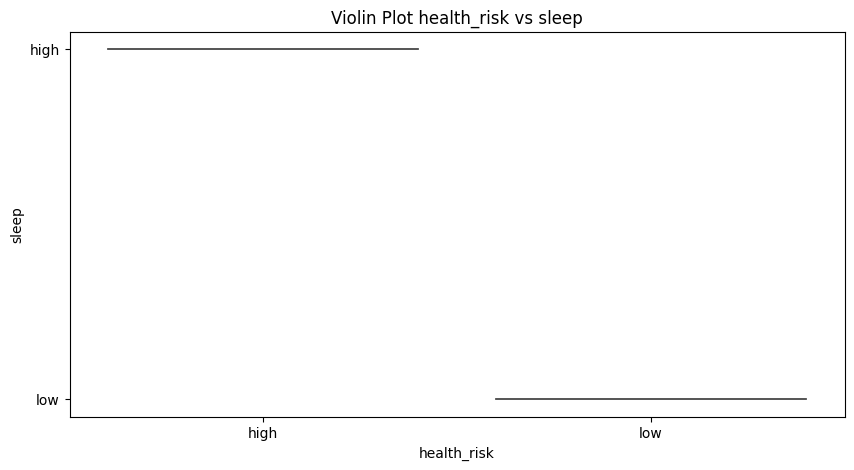

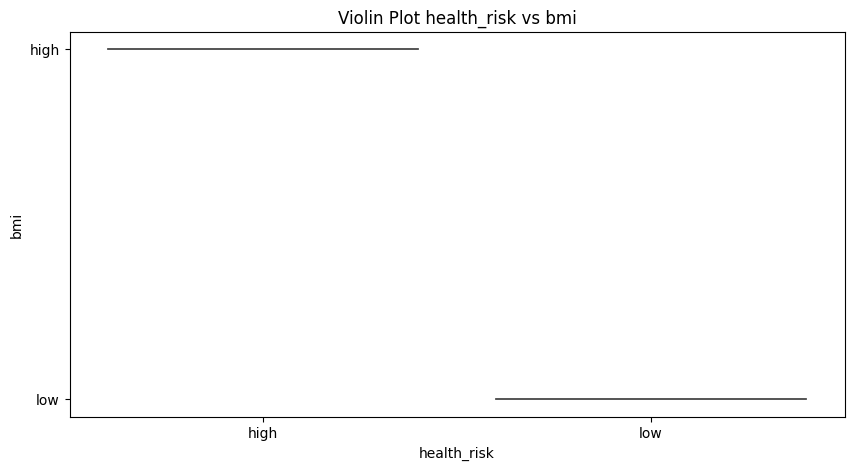

In [ ]:
for i in categorical_data:
  for j in numeric_data:

    plt.figure(figsize = (10,5))
    sns.violinplot(x=dataset[i], y=dataset['health_risk'])
    plt.title(f"Violin Plot {i} vs {j}")
    plt.xlabel(i)
    plt.ylabel(j)
    print("\n")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
dataset.drop_duplicates(inplace=True)

dataset.duplicated().sum()

np.int64(0)

In [ ]:
column_to_drop = []

dataset = dataset.drop(column_to_drop, axis=1)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


In [ ]:
encoders = {}

for cat in categorical_data.columns:
    dataset[cat] = dataset[cat].astype(str).str.strip()   # hapus spasi
    dataset[cat].replace(['', ' ', 'nan', 'None', 'NaN'], np.nan, inplace=True)

    if dataset[cat].isnull().sum() > 0:
        mode_val = dataset[cat].mode()[0]
        dataset[cat].fillna(mode_val, inplace=True)

    label_encoder = LabelEncoder()
    dataset[f'{cat}_encoded'] = label_encoder.fit_transform(dataset[cat])
    encoders[cat] = label_encoder

dataset.head()

/tmp/ipython-input-3306520456.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[cat].replace(['', ' ', 'nan', 'None', 'NaN'], np.nan, inplace=True)
/tmp/ipython-input-3306520456.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk,bmi_log,exercise_encoded,sugar_intake_encoded,smoking_encoded,alcohol_encoded,married_encoded,profession_encoded,health_risk_encoded
0,0.622951,0.343750,0.925926,1,0.442857,2,1,1,1,5,0.1550,0,0.144100,1,2,1,1,1,5,0
1,0.836066,0.484375,0.462963,0,0.557143,0,0,0,0,7,0.3725,0,0.316634,0,0,0,0,0,7,0
2,0.459016,0.953125,0.148148,0,0.514286,1,1,0,0,0,0.8475,0,0.613833,0,1,1,0,0,0,0
3,0.229508,0.140625,0.759259,2,0.785714,2,0,0,0,0,0.1050,1,0.099845,2,2,0,0,0,0,1
4,0.688525,0.828125,0.925926,0,0.714286,1,0,0,1,7,0.3600,0,0.307485,0,1,0,0,1,7,0


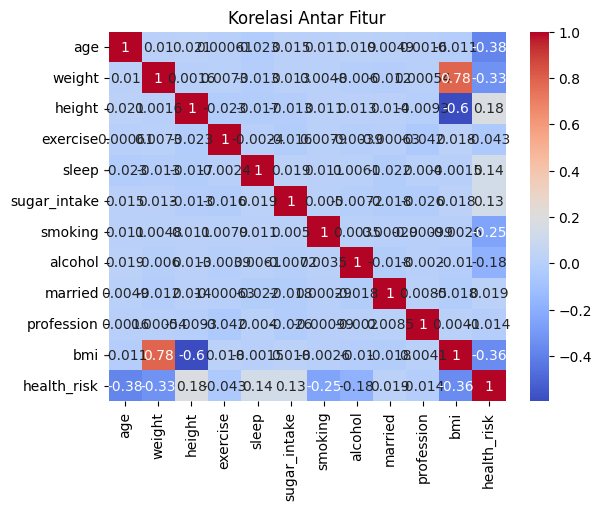

In [ ]:
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur")
plt.show()

In [ ]:
scaler = MinMaxScaler()
dataset[numeric_data.columns] = scaler.fit_transform(dataset[numeric_data.columns])

dataset.describe()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.505010,0.505613,0.498763,1.494200,0.571009,1.301200,0.195400,0.25180,0.603600,3.490800,0.386097,0.302000
std,0.293557,0.292415,0.293004,0.973322,0.204693,0.782688,0.396548,0.43409,0.489198,2.290014,0.206312,0.459171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.262295,0.250000,0.240741,1.000000,0.428571,1.000000,0.000000,0.00000,0.000000,1.000000,0.222500,0.000000
50%,0.508197,0.500000,0.490741,2.000000,0.571429,2.000000,0.000000,0.00000,1.000000,3.000000,0.365000,0.000000
75%,0.754098,0.765625,0.759259,2.000000,0.714286,2.000000,0.000000,1.00000,1.000000,6.000000,0.525000,1.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.00000,1.000000,7.000000,1.000000,1.000000


In [ ]:
outlier_columns = ['bmi']

dataset['bmi_log'] = np.log1p(dataset['bmi'])

dataset.describe()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk,bmi_log
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.505010,0.505613,0.498763,1.494200,0.571009,1.301200,0.195400,0.25180,0.603600,3.490800,0.386097,0.302000,0.315645
std,0.293557,0.292415,0.293004,0.973322,0.204693,0.782688,0.396548,0.43409,0.489198,2.290014,0.206312,0.459171,0.146756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.262295,0.250000,0.240741,1.000000,0.428571,1.000000,0.000000,0.00000,0.000000,1.000000,0.222500,0.000000,0.200898
50%,0.508197,0.500000,0.490741,2.000000,0.571429,2.000000,0.000000,0.00000,1.000000,3.000000,0.365000,0.000000,0.311154
75%,0.754098,0.765625,0.759259,2.000000,0.714286,2.000000,0.000000,1.00000,1.000000,6.000000,0.525000,1.000000,0.421994
max,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.00000,1.000000,7.000000,1.000000,1.000000,0.693147


In [ ]:
dataset.to_csv('preprocessed_dataset.csv', index=False)
dataset_raw.to_csv('raw_dataset.csv', index=False)